<a href="https://colab.research.google.com/github/kiarashrahmani/Image-enhancement/blob/main/image_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [2]:
!pip install opencv-python

# **change image to gray**

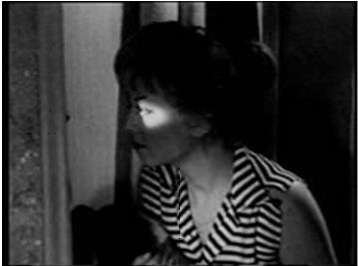

True

In [6]:
import cv2
from google.colab.patches import cv2_imshow

image_path = '/content/image.jpg'
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_image)
cv2.imwrite('gray_image.jpg', gray_image)

# **Calculating histogram of image**

In [7]:
img = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)
print(img)

[[247 255 244 ... 252 230 255]
 [255 221  37 ...  15  32 119]
 [255 249   2 ...   1  17 141]
 ...
 [254 253   3 ...   1   9 145]
 [251 248   6 ...   4  12 141]
 [254 251   9 ...   0   6 134]]


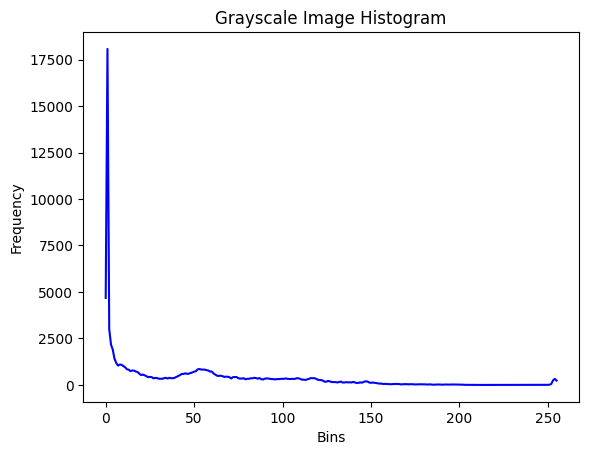

In [8]:
img = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist, color='b')
plt.title('Grayscale Image Histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()


# **Image enhancement**

## **Image Enhancement with Equalized histogram method**

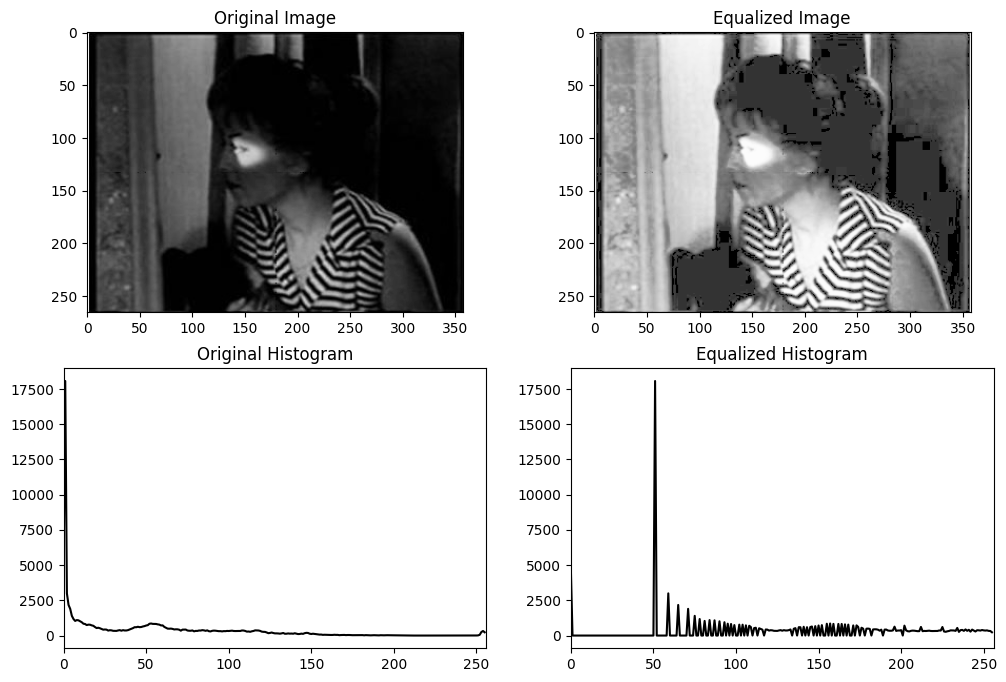

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)

equalized_image = cv2.equalizeHist(image)

hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Original Histogram')
plt.plot(hist_original, color='black')
plt.xlim([0, 256])

plt.subplot(2, 2, 4)
plt.title('Equalized Histogram')
plt.plot(hist_equalized, color='black')
plt.xlim([0, 256])

plt.show()

## **Image Enhancement with filter  method**

In [50]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def enhance_image_quality(image, kernels):
    enhanced_images = []

    for kernel in kernels:
        gamma = 0.5
        enhanced_image = np.power(image / 255.0, gamma) * 255.0
        enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)

        kernel_size = 3
        enhanced_image = cv2.medianBlur(enhanced_image, kernel_size)

        enhanced_image = cv2.filter2D(enhanced_image, -1, kernel)

        enhanced_images.append(enhanced_image)

    return enhanced_images


In [51]:
kernels = [
    np.array([[0, -1,  0],
              [-1, 5, -1],
              [0, -1, 0]]),
     np.array([[0, -0.8,  0],
              [-0.8, 5, -0.8],
              [0, -0.5, 0]]),
     np.array([[0, -0.8,  0],
              [-0.5, 5, -0.5],
              [0, -0.5, 0]]),
     np.array([[0, 0,  0],
              [0, 5, 0],
              [0, 0, 0]])

]

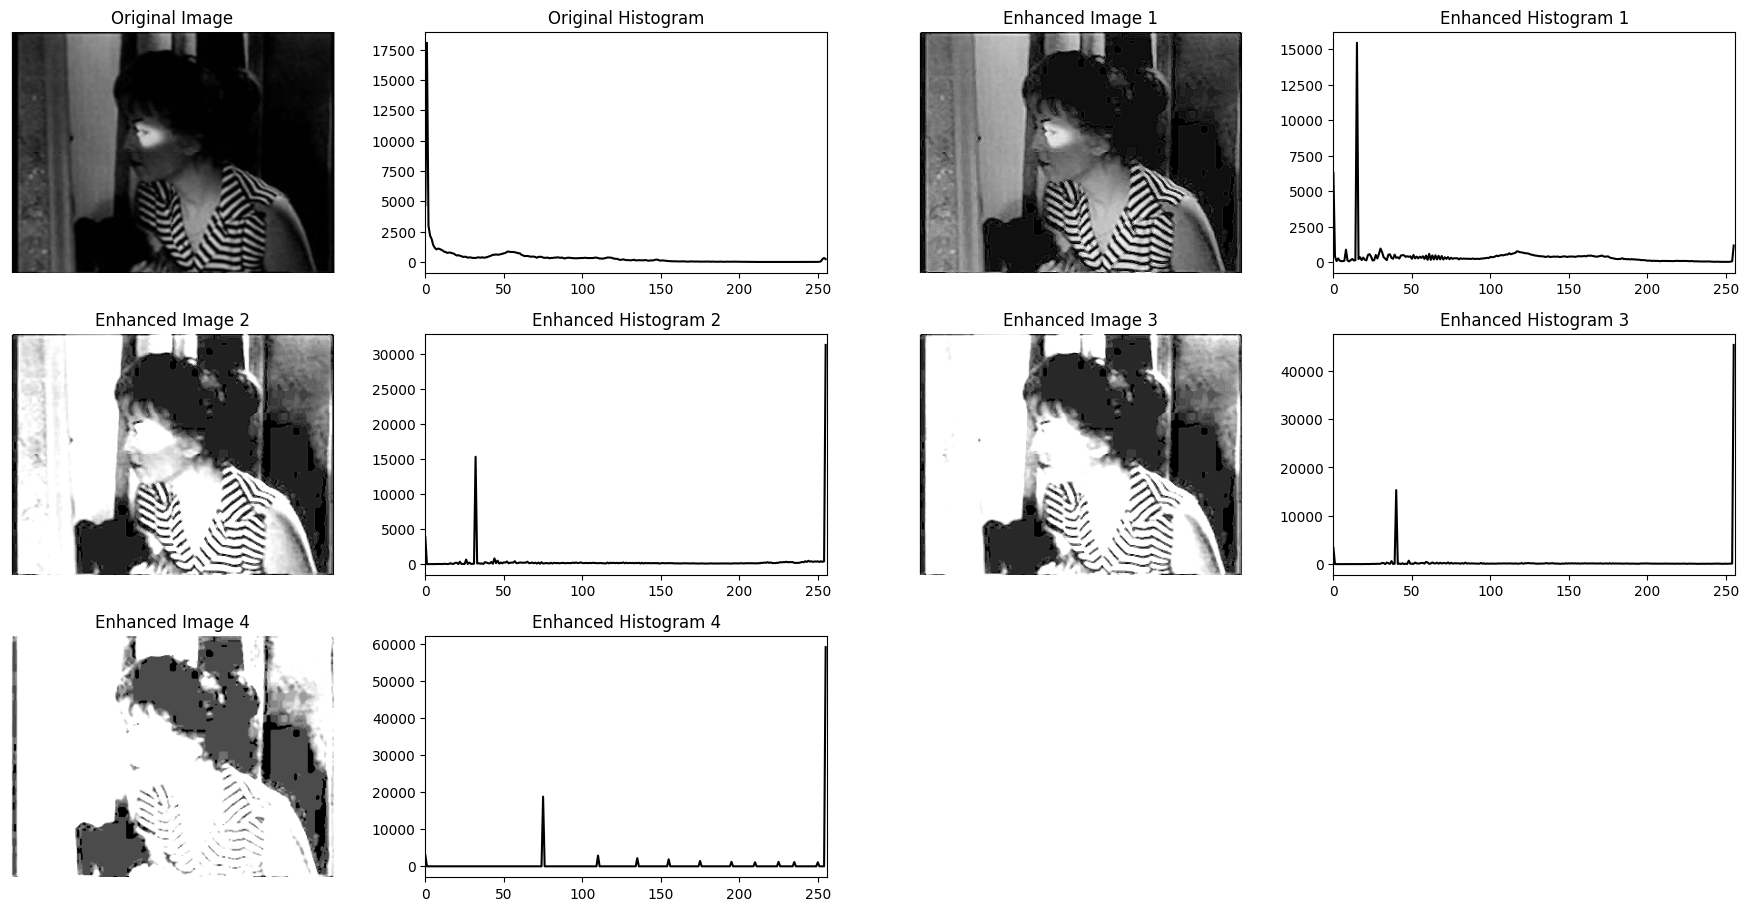

In [52]:
enhanced_images = enhance_image_quality(gray_image_2, kernels)

plt.figure(figsize=(18, 12))

plt.subplot(4, 4, 1)
plt.imshow(cv2.cvtColor(gray_image_2, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

hist_original = cv2.calcHist([gray_image_2], [0], None, [256], [0, 256])
plt.subplot(4, 4, 2)
plt.plot(hist_original, color='black')
plt.title('Original Histogram')
plt.xlim([0, 256])

for i, enhanced_image in enumerate(enhanced_images):
    plt.subplot(4, 4, (i+1)*2 + 1)
    plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Enhanced Image {i+1}")
    plt.axis('off')

    hist = cv2.calcHist([enhanced_image], [0], None, [256], [0, 256])
    plt.subplot(4, 4, (i+1)*2 + 2)
    plt.plot(hist, color='black')
    plt.title(f'Enhanced Histogram {i+1}')
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()

## **Image Enhancement with Gamma method**

In [44]:
import numpy as np

def root_transform(image, gammas):
    transformed_images = []

    for gamma in gammas:
        transformed_image = np.power(image / 255.0, gamma) * 255.0
        transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)

        transformed_images.append(transformed_image)

    return transformed_images

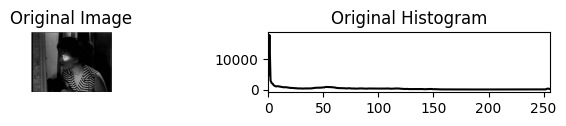

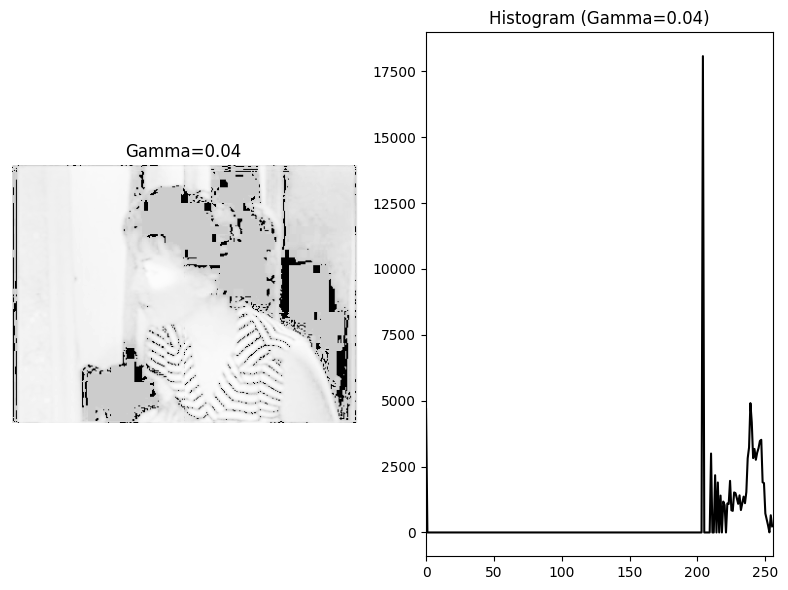

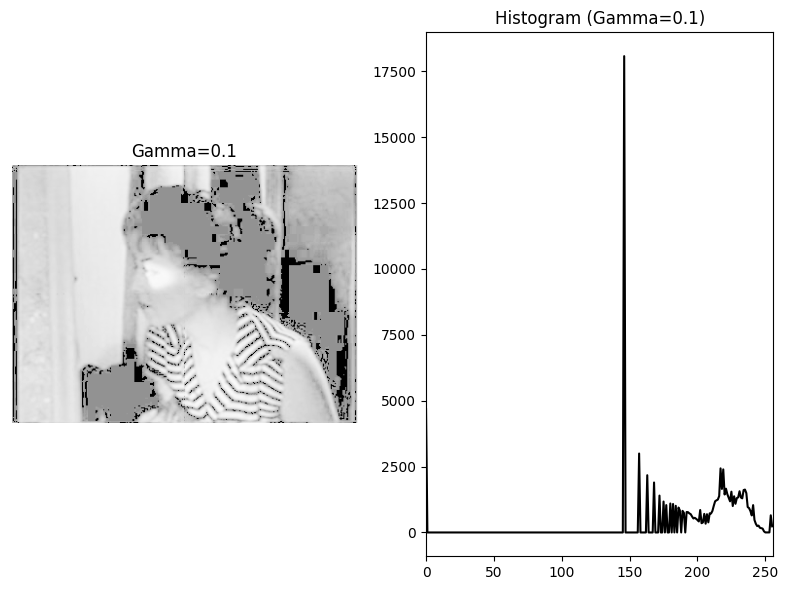

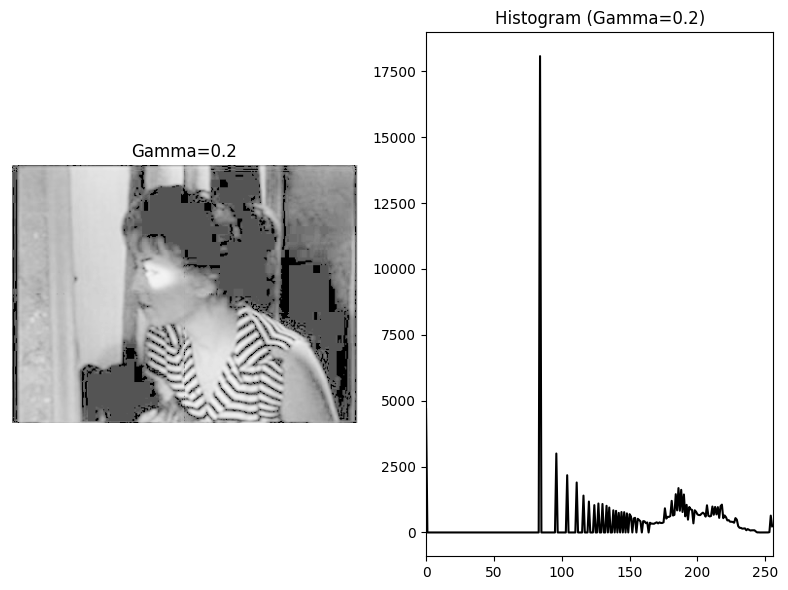

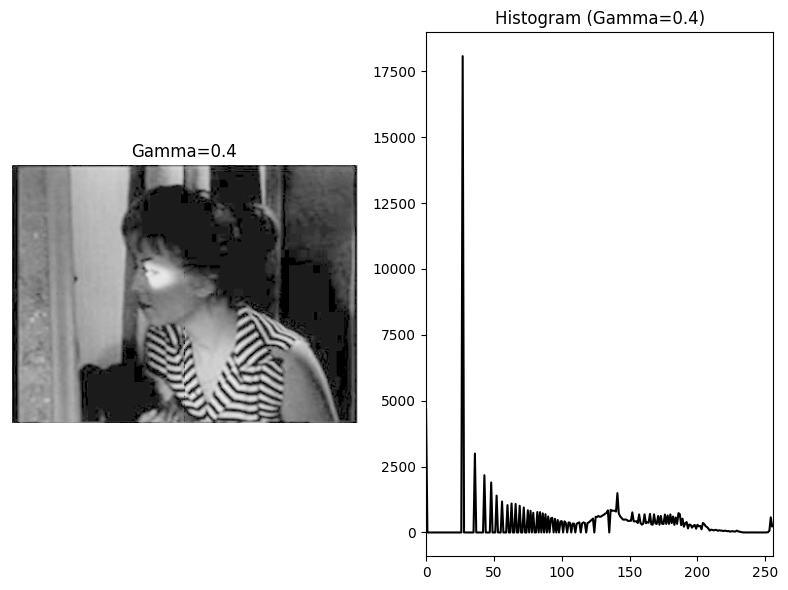

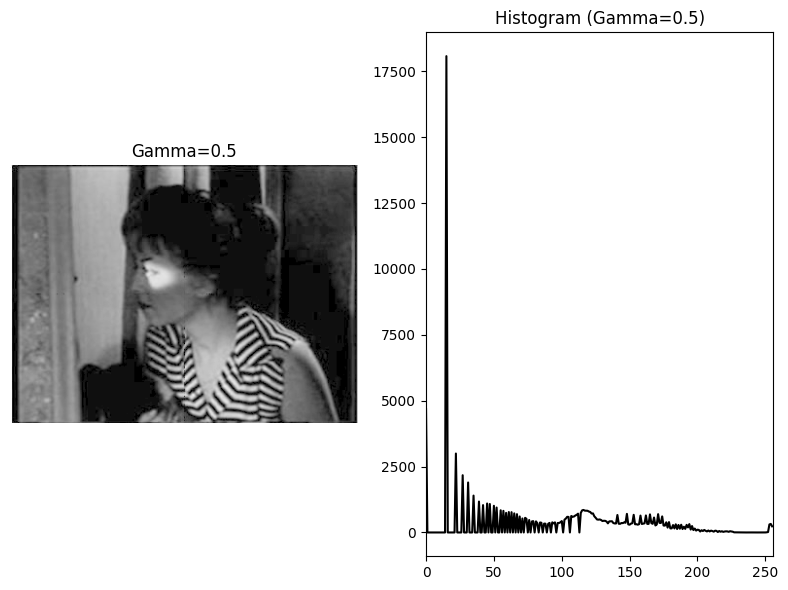

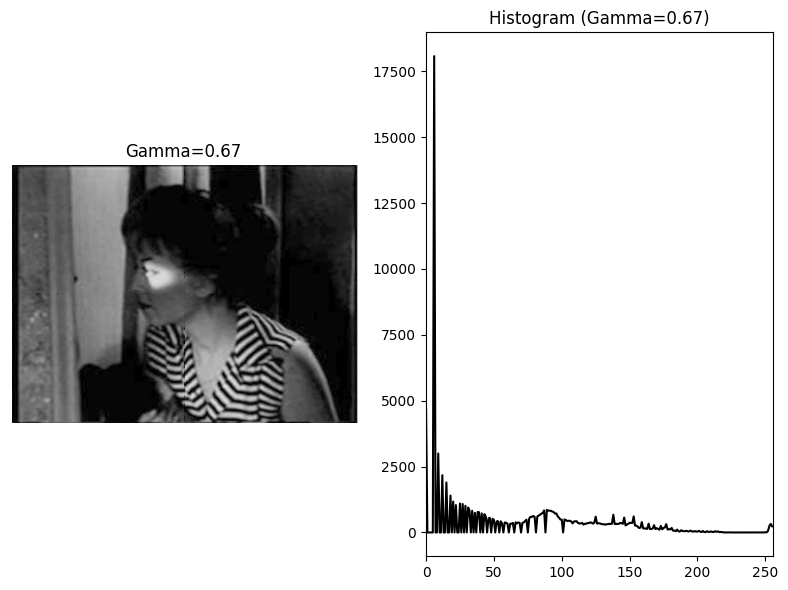

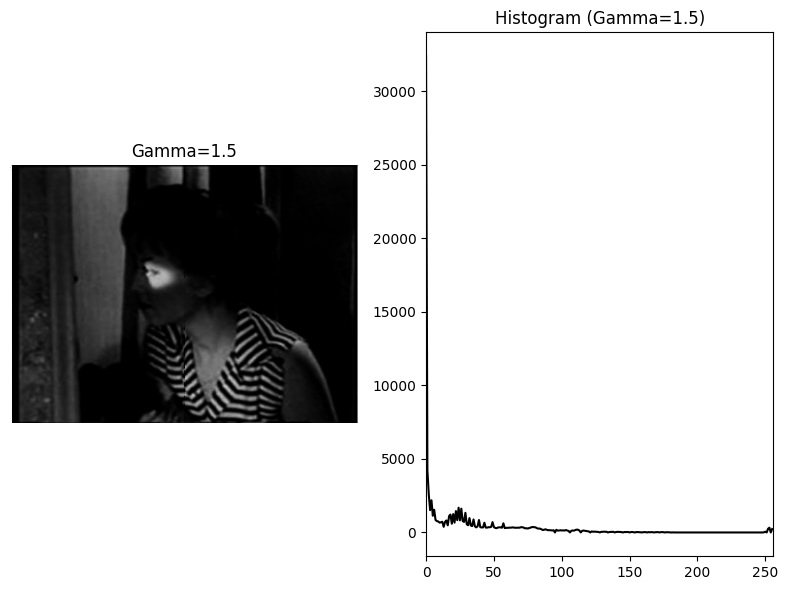

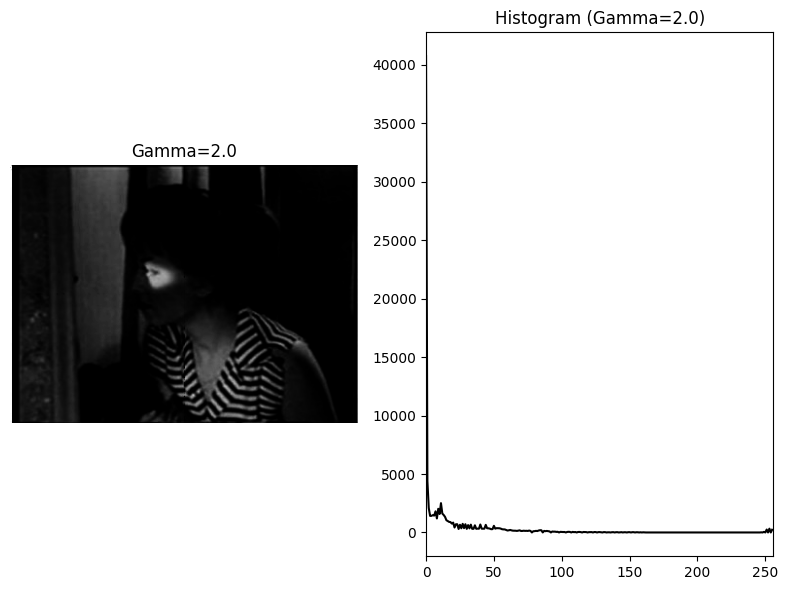

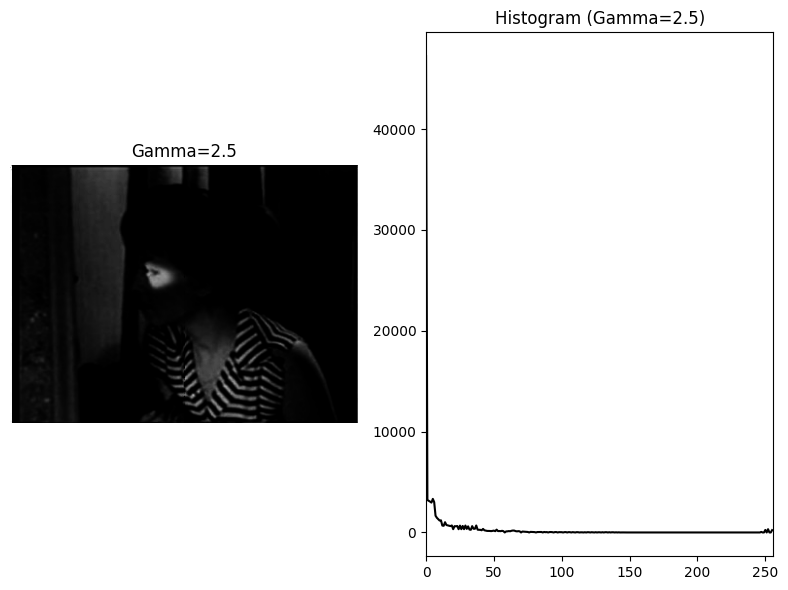

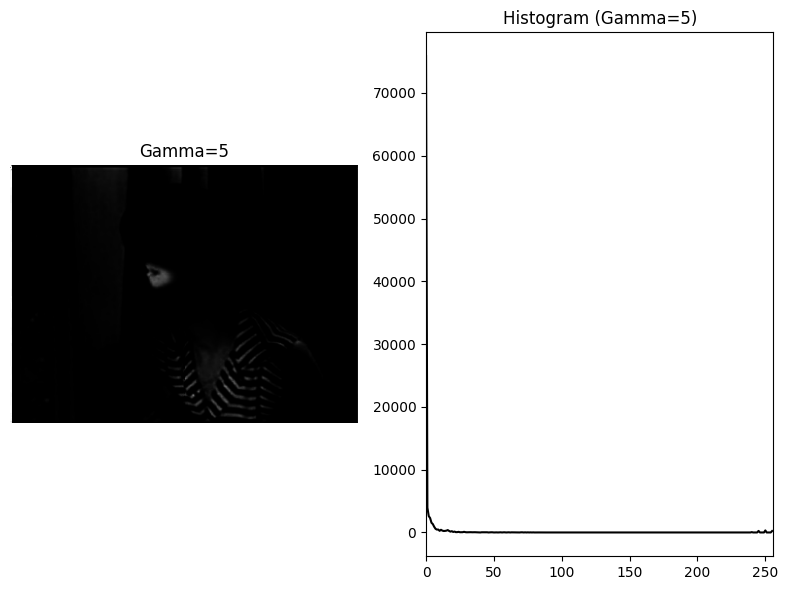

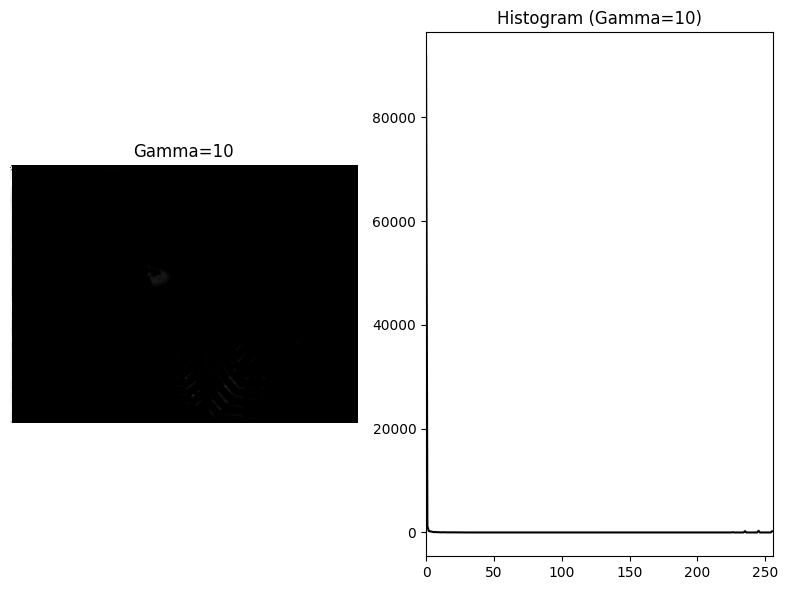

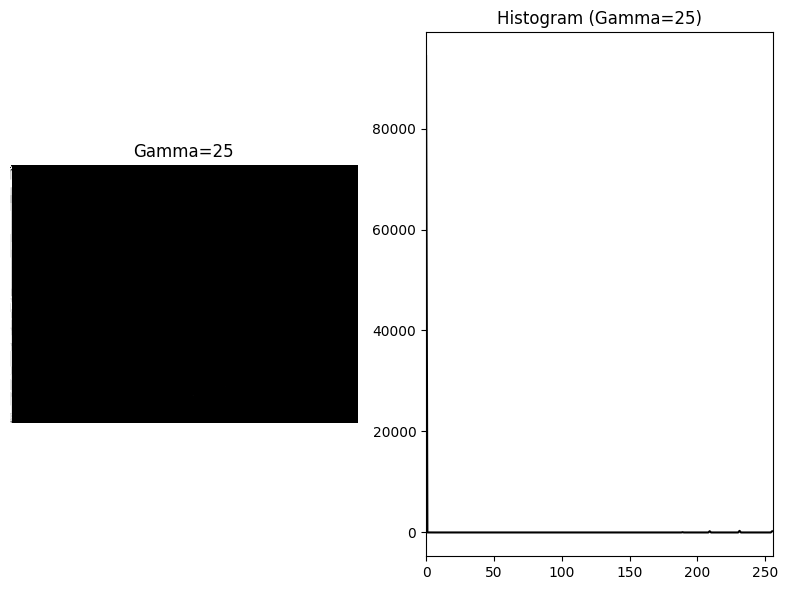

In [48]:
gray_image_2 = cv2.imread("/content/gray_image.jpg", cv2.IMREAD_GRAYSCALE)

gammas = [0.04, 0.1, 0.2, 0.4, 0.5, 0.67, 1.5, 2.0, 2.5, 5, 10, 25]

transformed_images = root_transform(gray_image_2, gammas)

plt.figure(figsize=(8, 12))

plt.subplot(len(gammas)+1, 2, 1)
plt.imshow(gray_image_2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

hist_original = cv2.calcHist([gray_image_2], [0], None, [256], [0, 256])
plt.subplot(len(gammas)+1, 2, 2)
plt.plot(hist_original, color='black')
plt.title('Original Histogram')
plt.xlim([0, 256])

for i, transformed_image in enumerate(transformed_images):
    plt.figure(figsize=(8, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(transformed_image, cmap='gray')
    plt.title(f'Gamma={gammas[i]}')
    plt.axis('off')

    hist_transformed = cv2.calcHist([transformed_image], [0], None, [256], [0, 256])
    plt.subplot(1, 2, 2)
    plt.plot(hist_transformed, color='black')
    plt.title(f'Histogram (Gamma={gammas[i]})')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()